In [1]:
from ast import literal_eval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Experiment Evaluation for the Ensemble Calibration Test using different Modifications

### 1. evaluate the initial setup for different values of $K$

In [32]:
results_lambda_sampling_h0 = pd.read_csv('final_results_experiments_t1t2_lambda_h0.csv')
results_lambda_sampling_h0

,N,M,K,R,u,alpha,H,CONFECE,CLASSECE
0,100,10,3,1000,0.01,0.05,M1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,100,10,3,1000,0.01,0.20,M1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,100,10,3,1000,0.01,0.50,M1,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ..."


function for plotting:

In [37]:
def plot_t1_erros_analysis(df: pd.DataFrame, list_errors: list = ['CONFECE', 'CLASSECE'], sampling_method: str = 'lambda',
                            take_avg: bool = True, plot_ha: bool = False):

    alphas = df['alpha'].values
    results = np.zeros((len(list_errors), len(df)))
    for i in range(len(list_errors)):
        results_i = df[list_errors[i]]
        for j in range(len(df)):
            mean_ij = (sum(literal_eval(results_i[j]))/len(literal_eval(results_i[j])))
            results[i, j] = mean_ij

    
    if not plot_ha:
        fig, ax = plt.subplots(len(list_errors), 1, figsize=(8, 12))
        for j in range(len(list_errors)):
            ax[j].plot(alphas, results[j])
            ax[j].plot(alphas, alphas, '--')
            ax[j].set_title(f'{list_errors[j]}')
            ax[j].set_xlabel(r'$\alpha$')
            ax[j].set_ylabel(r'Type $1$ error')
            ax[j].grid()
        
        plt.suptitle(r'Type $1$ error analysis, sampling: {}'.format(sampling_method))

    else:
        raise NotImplementedError

    return fig
            
        


    

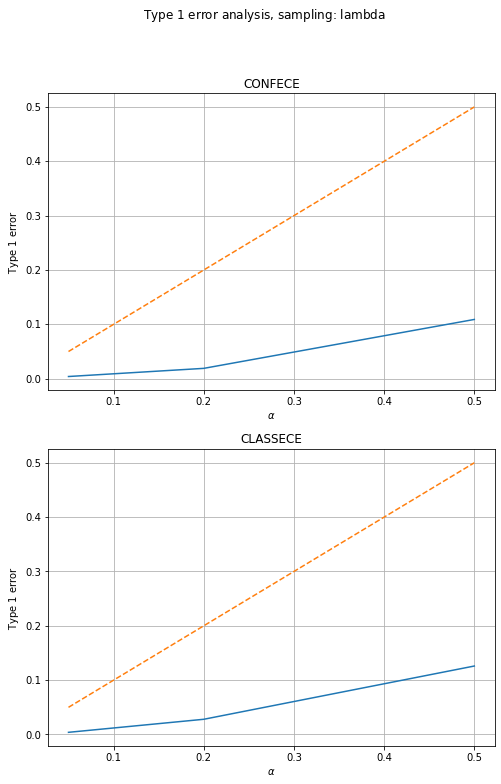

In [38]:
fig_lambdas = plot_t1_erros_analysis(results_lambda_sampling_h0)

In [ ]:
results_confece = results_lambda_sampling_h0['CONFECE']
results_classece = results_lambda_sampling_h0['CLASSECE']

results_classece[0]

In [70]:
means_rej_confece = np.zeros(3)
means_rej_classece = np.zeros(3)
alphas = results_lambda_sampling_h0['alpha'].to_numpy()
for i in range(len(results_confece)):
    means_rej_confece[i] = (sum(results_confece[i])/len(results_confece[i]))
    means_rej_classece[i] = (sum(results_classece[i])/len(results_classece[i]))


Text(0.5, 0.98, 'Type 1 error analysis with $K=3$')

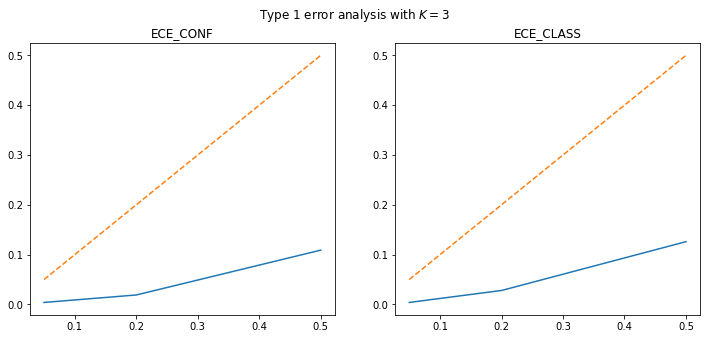

In [81]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(alphas, means_rej_confece)
ax[0].plot(alphas, alphas,'--' )
ax[0].set_title('ECE_CONF')
ax[1].plot(alphas, means_rej_classece)
ax[1].plot(alphas, alphas,'--' )
ax[1].set_title('ECE_CLASS')
plt.suptitle('Type 1 error analysis with $K=3$')
